In [1]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [2]:
import pandas, numpy

In [3]:
input_file = '/Users/adrian/research/egilsstadir/results/deseq2/DESeq2_TPM_values_transcript.tsv'

In [4]:
df = pandas.read_csv(input_file, sep='\t', index_col=0)
df

,C_17_18_1,C_17_18_2,C_17_18_3,C_17_42_1,C_17_42_2,C_17_42_3,C_KO1_63_1,C_KO1_63_2,C_KO1_63_3,C_WT_1,C_WT_2,C_WT_3
ENST00000308647.8,15.503098,15.971966,9.908598,10.600663,9.476987,9.187556,8.760484,8.853416,7.971648,9.853487,13.117011,7.029907
ENST00000378736.3,11.568010,13.983498,10.326241,7.816288,6.662112,9.258448,11.276900,5.564820,7.036099,8.093511,11.277120,8.263517
ENST00000472194.6,2.882821,3.224184,3.280103,3.216999,3.118358,3.368389,2.600499,1.739260,2.409527,2.413903,2.892084,2.393699
ENST00000474481.1,0.706451,1.000866,0.662746,1.364325,1.680743,1.339994,0.676399,0.648474,0.778121,0.662544,1.272634,0.897488
ENST00000485748.5,0.919742,1.095350,0.887733,1.048645,0.957466,1.130048,0.796892,1.065721,0.897275,0.725455,0.961970,0.612031
...,...,...,...,...,...,...,...,...,...,...,...,...
ENST00000619729.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENST00000612640.4,0.000000,0.196073,0.578112,0.439797,0.744402,0.523741,0.286653,1.018076,0.546899,0.282264,0.759455,0.291260
ENST00000614336.4,1.090646,1.256232,1.376277,0.893786,0.611950,0.733142,0.520683,0.348006,0.046215,0.503879,0.181049,0.370491
ENST00000601199.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
my_colors = ['gold', 'skyblue', 'tab:red', 'black']

In [6]:
# ATG7 201 from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6158294/
target_gene = 'ENST00000354449.7' # 201, ATG7(1)
df.loc[target_gene, ]

C_17_18_1     8.172266e-01
C_17_18_2     1.137716e+00
C_17_18_3     1.313706e-01
C_17_42_1     7.952148e-01
C_17_42_2     1.434374e-01
C_17_42_3     9.932374e-01
C_KO1_63_1    9.049561e-01
C_KO1_63_2    7.289896e-01
C_KO1_63_3    1.020988e+00
C_WT_1        2.202231e+00
C_WT_2        1.613392e+00
C_WT_3        9.879712e-10
Name: ENST00000354449.7, dtype: float64

[0.81722659 1.13771601 0.13137063]
[0.79521484 0.14343744 0.99323736]
[0.90495606 0.7289896  1.02098755]
[2.20223118e+00 1.61339230e+00 9.87971176e-10]


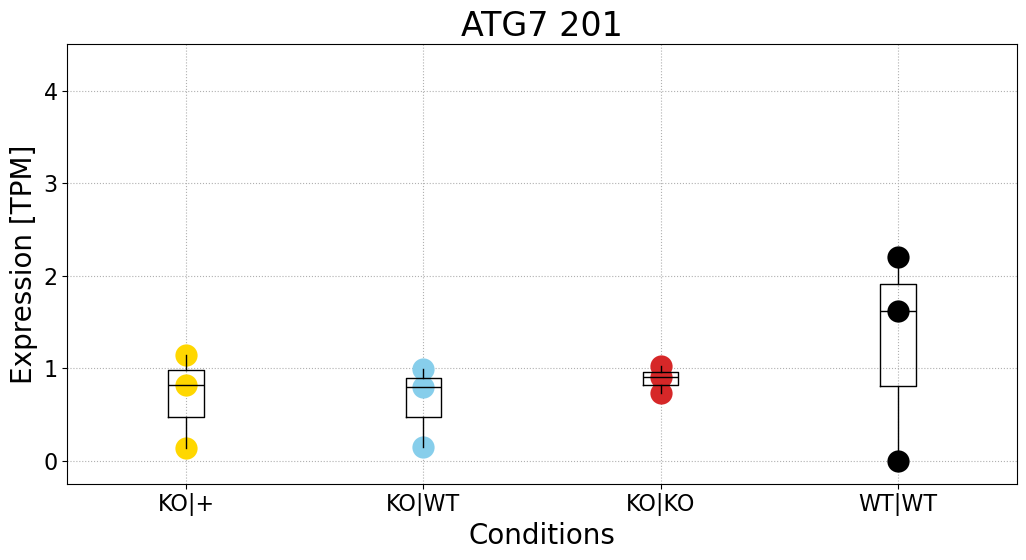

In [7]:
for group in range(4):
    initial = group * 3
    final = initial + 3
    tpm = df.loc[target_gene, ].iloc[initial:final].values
    print(tpm)
        
    matplotlib.pyplot.plot(numpy.repeat(group, len(tpm)), tpm, 'o', color=my_colors[group], alpha=3/3, mec='none', markersize=16)
    matplotlib.pyplot.boxplot(tpm, positions=[group], showcaps=False, medianprops=dict(color='black'))

matplotlib.pyplot.ylim([-0.25, 4.5])
matplotlib.pyplot.xticks([0, 1, 2, 3], ['KO|+', 'KO|WT', 'KO|KO', 'WT|WT'])
matplotlib.pyplot.ylabel('Expression [TPM]')
matplotlib.pyplot.xlabel('Conditions')
matplotlib.pyplot.title('ATG7 201')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [8]:
# ATG7 202 from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6158294/
target_gene = 'ENST00000354956.9' # 202, ATG7(2)
df.loc[target_gene, ]

C_17_18_1     9.125532
C_17_18_2     9.869290
C_17_18_3     8.595596
C_17_42_1     2.465500
C_17_42_2     2.839368
C_17_42_3     3.014911
C_KO1_63_1    0.000000
C_KO1_63_2    0.697184
C_KO1_63_3    0.000000
C_WT_1        2.535818
C_WT_2        2.976255
C_WT_3        2.203992
Name: ENST00000354956.9, dtype: float64

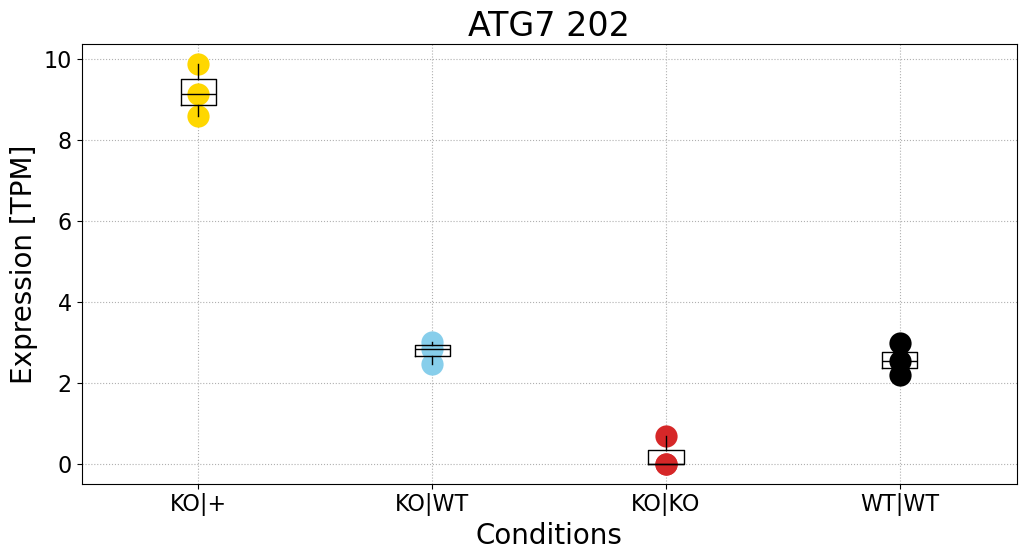

In [9]:
for group in range(4):
    initial = group * 3
    final = initial + 3
    tpm = df.loc[target_gene, ].iloc[initial:final].values
        
    matplotlib.pyplot.plot(numpy.repeat(group, len(tpm)), tpm, 'o', color=my_colors[group], alpha=3/3, mec='none', markersize=16)
    matplotlib.pyplot.boxplot(tpm, positions=[group], showcaps=False, medianprops=dict(color='black'))

matplotlib.pyplot.xticks([0, 1, 2, 3], ['KO|+', 'KO|WT', 'KO|KO', 'WT|WT'])
matplotlib.pyplot.ylabel('Expression [TPM]')
matplotlib.pyplot.xlabel('Conditions')
matplotlib.pyplot.title('ATG7 202')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [10]:
# ATG7 213 from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6158294/
target_gene = 'ENST00000446450.6' # 213, ATG7(3)
df.loc[target_gene, ]

C_17_18_1     0.312209
C_17_18_2     0.000000
C_17_18_3     0.000000
C_17_42_1     0.000000
C_17_42_2     0.099700
C_17_42_3     0.000000
C_KO1_63_1    0.000000
C_KO1_63_2    0.215377
C_KO1_63_3    0.000000
C_WT_1        0.000000
C_WT_2        0.000000
C_WT_3        0.265679
Name: ENST00000446450.6, dtype: float64

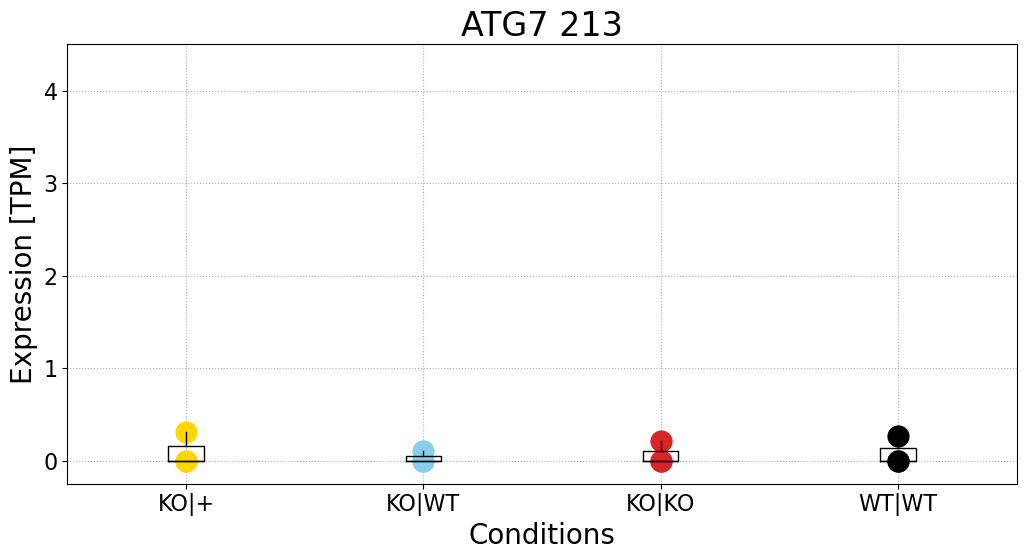

In [11]:
for group in range(4):
    initial = group * 3
    final = initial + 3
    tpm = df.loc[target_gene, ].iloc[initial:final].values
        
    matplotlib.pyplot.plot(numpy.repeat(group, len(tpm)), tpm, 'o', color=my_colors[group], alpha=3/3, mec='none', markersize=16)
    matplotlib.pyplot.boxplot(tpm, positions=[group], showcaps=False, medianprops=dict(color='black'))

matplotlib.pyplot.ylim([-0.25, 4.5])
matplotlib.pyplot.xticks([0, 1, 2, 3], ['KO|+', 'KO|WT', 'KO|KO', 'WT|WT'])
matplotlib.pyplot.ylabel('Expression [TPM]')
matplotlib.pyplot.xlabel('Conditions')
matplotlib.pyplot.title('ATG7 213')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()